In [1]:
from sklearn.metrics import accuracy_score,confusion_matrix
from Inference.Facenet import Facenet
import matplotlib.pyplot as plt
from imutils import paths
from os.path import sep
import seaborn as sns
import cv2

2022-06-22 22:30:01.706257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 22:30:01.706296: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load ảnh test

In [2]:
image_paths = list(paths.list_images("./Dataset/UNKNOWN-TEST"))
person_img = []
for ip in image_paths:
    image = cv2.imread(ip)
    person_img.append(image)
person_name = ["UNKNOWN"]*len(person_img)
len(person_img)

50

Nhận diện

In [3]:
fn = Facenet()
person_predict = []
person_distance = []
for pi in person_img:
    identity, distance, _, _ = fn.Get_People_Identity_SVM(pi)[0]
    person_predict.append(identity)
    person_distance.append(distance)

2022-06-22 22:30:07.667795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/phuocleoceo/.local/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-22 22:30:07.667818: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-22 22:30:07.667859: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PLCLaptop): /proc/driver/nvidia/version does not exist
2022-06-22 22:30:07.668103: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/phuocleoceo/.local/

In [4]:
for i in range(len(person_predict)):
    if person_predict[i]!="UNKNOWN":
        print(f"{person_distance[i]}, {person_predict[i]} ,{image_paths[i]}")

0.675346256174569, Thinh ,./Dataset/UNKNOWN-TEST/vanvy.jpg


Đánh giá

In [5]:
person_predict_acc = accuracy_score(person_name,person_predict)*100
print(f">> Accuracy : {person_predict_acc} (%)")

>> Accuracy : 98.0 (%)


Text(69.0, 0.5, 'True label')

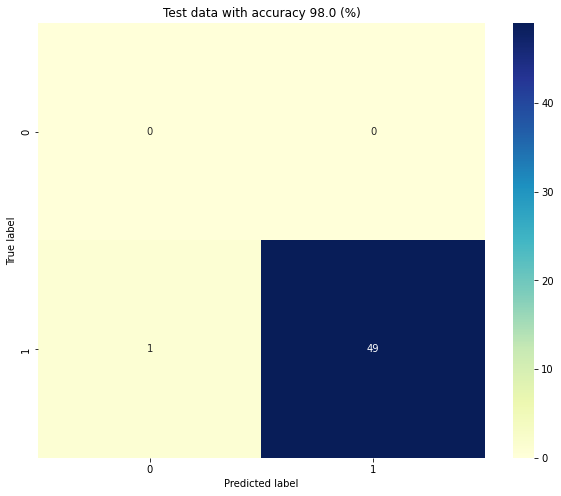

In [6]:
plt.figure(figsize=(10, 8))
plt.title(f"Test data with accuracy {person_predict_acc} (%)")
sns.heatmap(confusion_matrix(person_name, person_predict), cmap="YlGnBu", annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')